# Assignment for AML Course

##Start

In [ ]:
# Upload the files
from google.colab import files
files.upload()

Saving Loan_Train.csv to Loan_Train (1).csv


{'Loan_Train.csv': b'Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status\r\nLP001002,Male,No,0,Graduate,No,5849,0,,360,1,Urban,Y\r\nLP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N\r\nLP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y\r\nLP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y\r\nLP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y\r\nLP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y\r\nLP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y\r\nLP001014,Male,Yes,3+,Graduate,No,3036,2504,158,360,0,Semiurban,N\r\nLP001018,Male,Yes,2,Graduate,No,4006,1526,168,360,1,Urban,Y\r\nLP001020,Male,Yes,1,Graduate,No,12841,10968,349,360,1,Semiurban,N\r\nLP001024,Male,Yes,2,Graduate,No,3200,700,70,360,1,Urban,Y\r\nLP001027,Male,Yes,2,Graduate,,2500,1840,109,360,1,Urban,Y\r\nLP001028,Male,Yes,2,Graduate,No,3073,8106,200,360,1,Urban,

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
# Read the data
data = pd.read_csv('Loan_Train.csv')
data.head(5)    # First five rows of the data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Check the data size
data.shape

(614, 13)

## Data Analyzing

In [ ]:
# Check for empty rows
print(data.shape)
data.isnull().sum()

(614, 13)


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Model Building

In [ ]:
# Convert text data into a numeric ones
dummy_data = pd.get_dummies(data.drop(['Loan_ID','Loan_Status'], axis=1))
dummy_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,NaN,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [ ]:
# Select X and y
y = data['Loan_Status']
X = dummy_data
print(X, y)

     ApplicantIncome  ...  Property_Area_Urban
0               5849  ...                    1
1               4583  ...                    0
2               3000  ...                    1
3               2583  ...                    1
4               6000  ...                    1
..               ...  ...                  ...
609             2900  ...                    0
610             4106  ...                    0
611             8072  ...                    1
612             7583  ...                    1
613             4583  ...                    0

[614 rows x 20 columns] 0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object


In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
X= imp.fit_transform(X)


In [ ]:
data['Loan_Status'] = data['Loan_Status'].map( {'Y' : 1, 'N' : 0} )
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


##Data Visualizations

In [ ]:
data.describe(include = 'O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
count,614,601,611,599,614,582,614
unique,614,2,2,4,2,2,3
top,LP002529,Male,Yes,0,Graduate,No,Semiurban
freq,1,489,398,345,480,500,233


In [ ]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
print(categorical_columns)
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(numerical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


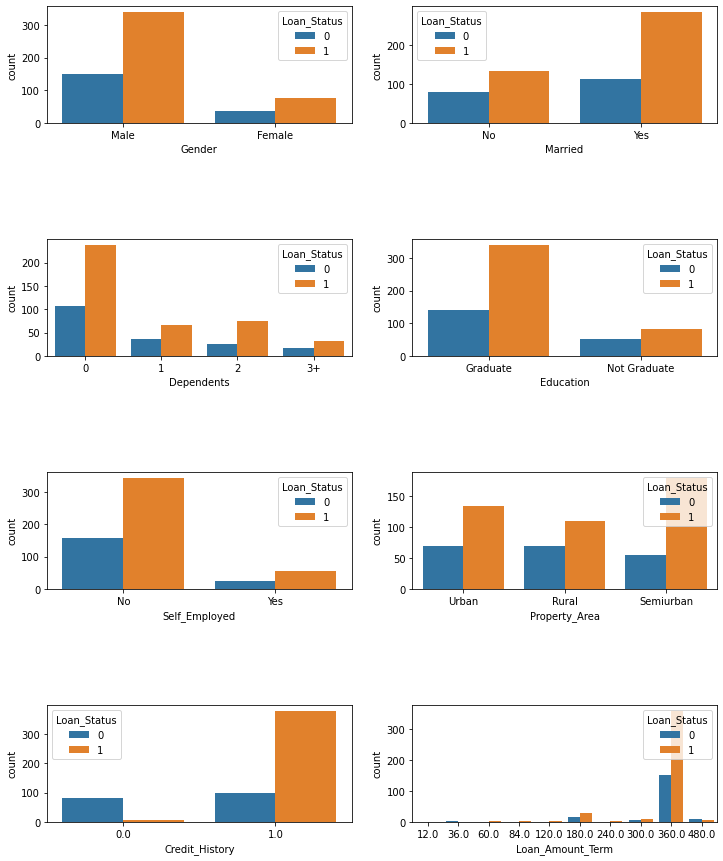

In [ ]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=data,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

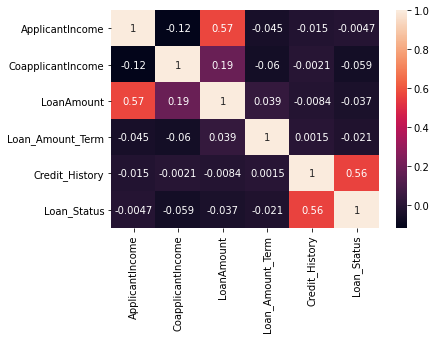

In [ ]:
sns.heatmap(data.corr(), annot = True)

In [ ]:
data[['Loan_Status', 'Gender']].groupby(['Gender']).mean()

,Loan_Status
Gender,
Female,0.669643
Male,0.693252


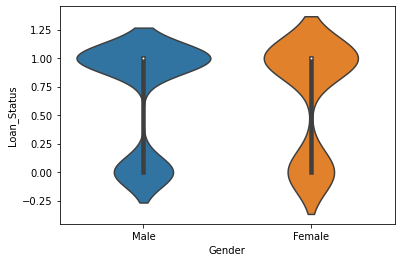

In [ ]:
sns.violinplot(x = 'Gender', y = 'Loan_Status', data = data)

In [ ]:
data[['Married', 'Gender', 'Loan_Status']].groupby(['Married'], as_index = False).mean()

,Married,Loan_Status
0,No,0.629108
1,Yes,0.716080


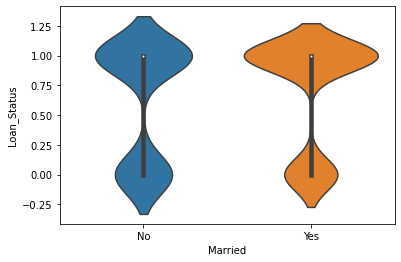

In [ ]:
sns.violinplot(x = 'Married', y = 'Loan_Status', data = data)

In [ ]:
data[['Married', 'Gender','Dependents', 'Loan_Status']].groupby(['Dependents'], as_index = False).mean()

,Dependents,Loan_Status
0,0,0.689855
1,1,0.647059
2,2,0.752475
3,3+,0.647059


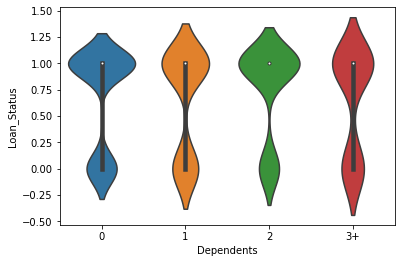

In [ ]:
sns.violinplot(x = 'Dependents', y = 'Loan_Status', data = data)

In [ ]:
data[['Loan_Status', 'Self_Employed']].groupby(['Self_Employed']).mean()

,Loan_Status
Self_Employed,
No,0.686000
Yes,0.682927


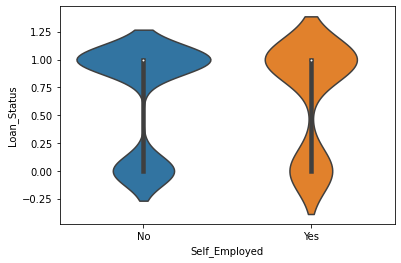

In [ ]:
sns.violinplot(x = 'Self_Employed', y = 'Loan_Status', data = data)

In [ ]:
data[['Loan_Status', 'Credit_History']].groupby(['Credit_History']).mean()

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


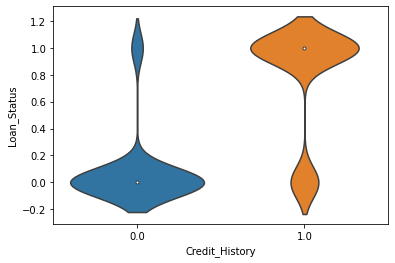

In [ ]:
sns.violinplot(x = 'Credit_History', y = 'Loan_Status', data = data)

In [ ]:
data[['Loan_Status', 'Education']].groupby(['Education']).mean()

,Loan_Status
Education,
Graduate,0.708333
Not Graduate,0.611940


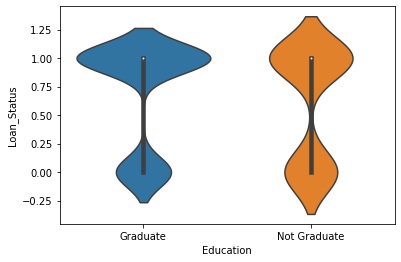

In [ ]:
sns.violinplot(x = 'Education', y = 'Loan_Status', data = data)

In [ ]:
data[['Property_Area', 'Loan_Status']].groupby(['Property_Area'], as_index = False).mean().sort_values(['Loan_Status'], ascending = False)

,Property_Area,Loan_Status
1,Semiurban,0.768240
2,Urban,0.658416
0,Rural,0.614525


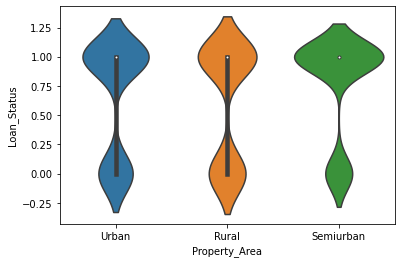

In [ ]:
sns.violinplot(x = 'Property_Area', y = 'Loan_Status', data = data)

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


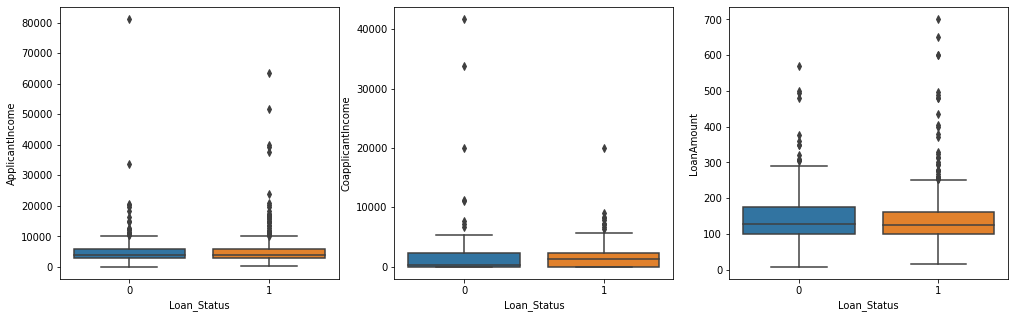

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=data,x='Loan_Status',ax=axes[idx])

print(data[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

##Data Normalizing

In [ ]:
# Data normalization
from sklearn.preprocessing import  MinMaxScaler

scaler = MinMaxScaler()
data[['ApplicantIncome']] = scaler.fit_transform(data[['ApplicantIncome']])
data[['CoapplicantIncome']] = scaler.fit_transform(data[['CoapplicantIncome']])
data[['LoanAmount']] = scaler.fit_transform(data[['LoanAmount']])

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean          0.064978           0.038910    0.198860
std           0.075560           0.070229    0.123860
min           0.000000           0.000000    0.000000
25%           0.033735           0.000000    0.131693
50%           0.045300           0.028524    0.172214
75%           0.069821           0.055134    0.230101
max           1.000000           1.000000    1.000000


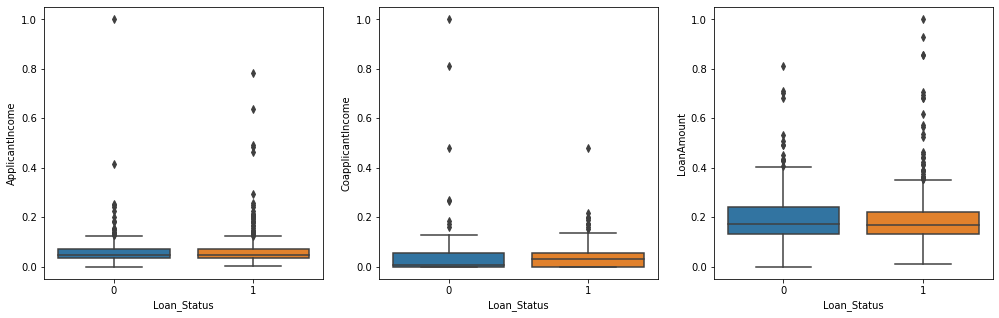

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=data,x='Loan_Status',ax=axes[idx])

print(data[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

##Splittting Data



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
print(X_train.shape, X_test.shape, y_test.shape, y_train.shape)


(491, 20) (123, 20) (123,) (491,)


In [ ]:
y_train = y_train.map({"Y" : 1, "N": 0})
y_test = y_test.map( {"Y": 1, "N": 0} )

In [ ]:
print(y_train.mean(), y_test.mean())

0.6863543788187373 0.6910569105691057


##Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

preds = model.predict(X_test)

In [ ]:
preds

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0])

In [ ]:
y_test

150    0
559    1
598    1
235    1
145    1
      ..
363    1
280    0
7      0
289    1
373    0
Name: Loan_Status, Length: 123, dtype: int64

In [ ]:
# Check the accuracy
model.score(X_test, y_test)

0.8455284552845529

In [ ]:
# Other validation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

# Check accruacy
print(accuracy_score(y_pred=preds, y_true=y_test))

0.8455284552845529


In [ ]:
# Print the confusion matrix
confusion_matrix(y_true=y_test, y_pred=preds)

array([[22, 16],
       [ 3, 82]])

In [ ]:
# Print the classification report
print(classification_report(y_true=y_test, y_pred=preds))

              precision    recall  f1-score   support

           0       0.88      0.58      0.70        38
           1       0.84      0.96      0.90        85

    accuracy                           0.85       123
   macro avg       0.86      0.77      0.80       123
weighted avg       0.85      0.85      0.84       123



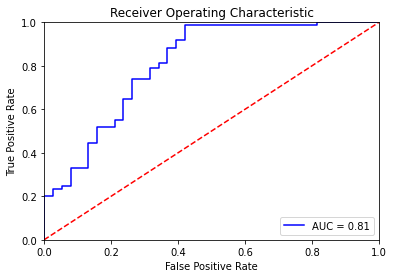

In [ ]:
# ROC Curve

# calculate the fpr and tpr for all thresholds of the classification
scores  = model.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_true=y_test, y_score=scores[:, 1])
roc_auc = auc(fpr, tpr)

# model
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
12 / (12 + 1)

0.9230769230769231

In [ ]:
# Yes precision
67/(67 + 16)

0.8072289156626506

In [ ]:
# Recall yes
67 / (67 + 1)

0.9852941176470589

##Knn


In [ ]:
error = []

# Calculating error for K values between 1 and 40

from sklearn.neighbors import KNeighborsClassifier
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

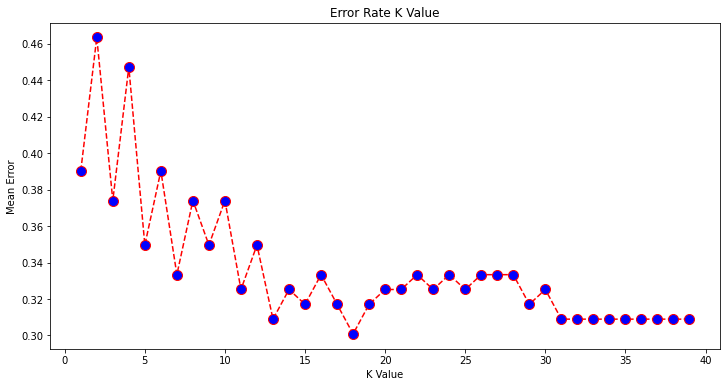

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors=7)
model1.fit(X_train, y_train)
preds1 = model1.predict(X_test)

In [ ]:
preds1

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
y_test

150    0
559    1
598    1
235    1
145    1
      ..
363    1
280    0
7      0
289    1
373    0
Name: Loan_Status, Length: 123, dtype: int64

In [ ]:
# Check the accuracy
model1.score(X_test, y_test)

0.6666666666666666

In [ ]:
# Other validation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

# Check accruacy
print(accuracy_score(y_pred=preds1, y_true=y_test))

0.6666666666666666


In [ ]:
# Print the confusion matrix
confusion_matrix(y_true=y_test, y_pred=preds1)

array([[10, 28],
       [13, 72]])

In [ ]:
# Print the classification report
print(classification_report(y_true=y_test, y_pred=preds1))

              precision    recall  f1-score   support

           0       0.43      0.26      0.33        38
           1       0.72      0.85      0.78        85

    accuracy                           0.67       123
   macro avg       0.58      0.56      0.55       123
weighted avg       0.63      0.67      0.64       123



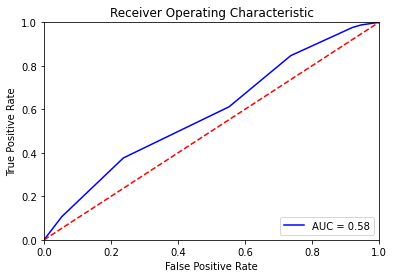

In [ ]:
# ROC Curve

# calculate the fpr and tpr for all thresholds of the classification
scores  = model1.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_true=y_test, y_score=scores[:, 1])
roc_auc = auc(fpr, tpr)

# model
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##Logistic Regression



In [ ]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(max_iter = 700)
model2.fit(X_train, y_train)
preds2 = model2.predict(X_test)

In [ ]:
preds2

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0])

In [ ]:
y_test

150    0
559    1
598    1
235    1
145    1
      ..
363    1
280    0
7      0
289    1
373    0
Name: Loan_Status, Length: 123, dtype: int64

In [ ]:
# Check the accuracy
model2.score(X_test, y_test)

0.8617886178861789

In [ ]:
# Other validation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, log_loss

# Check accruacy
print(accuracy_score(y_pred=preds2, y_true=y_test))

0.8617886178861789


In [ ]:
#Check Log loss
print(log_loss(y_pred=preds2, y_true=y_test))

4.7737560347346735


In [ ]:
# Print the confusion matrix
confusion_matrix(y_true=y_test, y_pred=preds2)

array([[22, 16],
       [ 1, 84]])

In [ ]:
# Print the classification report
print(classification_report(y_true=y_test, y_pred=preds2))

              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123



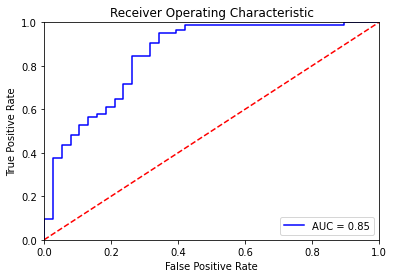

In [ ]:
# ROC Curve

# calculate the fpr and tpr for all thresholds of the classification
scores  = model2.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_true=y_test, y_score=scores[:, 1])
roc_auc = auc(fpr, tpr)

# model
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##SVM


In [ ]:
from sklearn.svm import SVC
model3 = SVC(kernel='linear')
model3.fit(X_train, y_train)
preds3 = model3.predict(X_test)


In [ ]:
preds3


array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [ ]:
y_test

150    0
559    1
598    1
235    1
145    1
      ..
363    1
280    0
7      0
289    1
373    0
Name: Loan_Status, Length: 123, dtype: int64

In [ ]:
# Check the accuracy
model3.score(X_test, y_test)

0.8130081300813008

In [ ]:
# Other validation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, log_loss

# Check accruacy
print(accuracy_score(y_pred=preds3, y_true=y_test))

0.8130081300813008


In [ ]:
#Check Log loss
print(log_loss(y_pred=preds3, y_true=y_test))

6.458613400214716


In [ ]:
# Print the confusion matrix
confusion_matrix(y_true=y_test, y_pred=preds3)

array([[16, 22],
       [ 1, 84]])

In [ ]:
# Print the classification report
print(classification_report(y_true=y_test, y_pred=preds3))

              precision    recall  f1-score   support

           0       0.94      0.42      0.58        38
           1       0.79      0.99      0.88        85

    accuracy                           0.81       123
   macro avg       0.87      0.70      0.73       123
weighted avg       0.84      0.81      0.79       123



In [ ]:
from sklearn.svm import SVC
model3 = SVC(kernel='linear')
model3 = SVC(probability=True)
model3.fit(X_train, y_train)
preds3 = model3.predict(X_test)

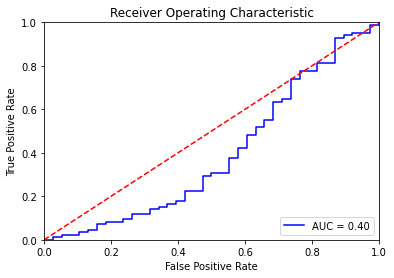

In [ ]:
# ROC Curve

# calculate the fpr and tpr for all thresholds of the classification
scores  = model3.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_true=y_test, y_score=scores[:, 1])
roc_auc = auc(fpr, tpr)

# model
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##Kernel SVM

###Polynomial Kernel


In [ ]:
from sklearn.svm import SVC
model4 = SVC(kernel='poly', degree=8)
model4.fit(X_train, y_train)
preds4 = model4.predict(X_test)

In [ ]:
preds4

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
y_test

150    0
559    1
598    1
235    1
145    1
      ..
363    1
280    0
7      0
289    1
373    0
Name: Loan_Status, Length: 123, dtype: int64

In [ ]:
# Check the accuracy
model4.score(X_test, y_test)

0.6991869918699187

In [ ]:
# Other validation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

# Check accruacy
print(accuracy_score(y_pred=preds4, y_true=y_test))

0.6991869918699187


In [ ]:
# Print the confusion matrix
confusion_matrix(y_true=y_test, y_pred=preds4)

array([[ 1, 37],
       [ 0, 85]])

In [ ]:
# Print the classification report
print(classification_report(y_true=y_test, y_pred=preds4))

              precision    recall  f1-score   support

           0       1.00      0.03      0.05        38
           1       0.70      1.00      0.82        85

    accuracy                           0.70       123
   macro avg       0.85      0.51      0.44       123
weighted avg       0.79      0.70      0.58       123



In [ ]:
from sklearn.svm import SVC
model4 = SVC(kernel='poly', degree=8)
model4 = SVC(probability=True)
model4.fit(X_train, y_train)
preds4 = model4.predict(X_test)

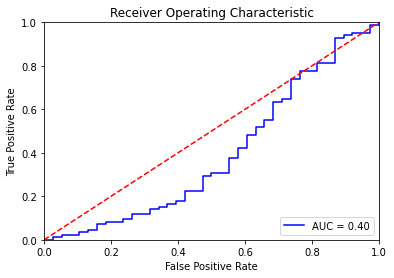

In [ ]:
# ROC Curve

# calculate the fpr and tpr for all thresholds of the classification
scores  = model4.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_true=y_test, y_score=scores[:, 1])
roc_auc = auc(fpr, tpr)

# model
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###Gaussian Kernel

In [ ]:
from sklearn.svm import SVC
model5 = SVC(kernel='rbf')
model5.fit(X_train, y_train)
preds5 = model5.predict(X_test)

In [ ]:
preds5

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
y_test

150    0
559    1
598    1
235    1
145    1
      ..
363    1
280    0
7      0
289    1
373    0
Name: Loan_Status, Length: 123, dtype: int64

In [ ]:
# Check the accuracy
model5.score(X_test, y_test)

0.6910569105691057

In [ ]:
# Other validation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

# Check accruacy
print(accuracy_score(y_pred=preds5, y_true=y_test))

0.6910569105691057


In [ ]:
# Print the confusion matrix
confusion_matrix(y_true=y_test, y_pred=preds5)

array([[ 0, 38],
       [ 0, 85]])

In [ ]:
# Print the classification report
print(classification_report(y_true=y_test, y_pred=preds5))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.69      1.00      0.82        85

    accuracy                           0.69       123
   macro avg       0.35      0.50      0.41       123
weighted avg       0.48      0.69      0.56       123



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.svm import SVC
model5 = SVC(kernel='rbf')
model5= SVC(probability=True)
model5.fit(X_train, y_train)
preds5 = model5.predict(X_test)

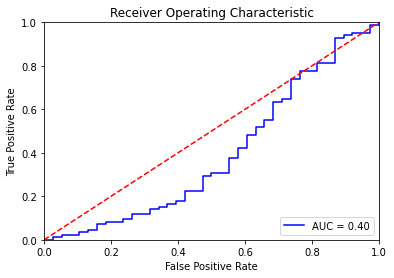

In [ ]:
# ROC Curve

# calculate the fpr and tpr for all thresholds of the classification
scores  = model5.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_true=y_test, y_score=scores[:, 1])
roc_auc = auc(fpr, tpr)

# model
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###Sigmoid Kernel

In [ ]:
from sklearn.svm import SVC
model6 = SVC(kernel='sigmoid')
model6.fit(X_train, y_train)
preds6 = model6.predict(X_test)

In [ ]:
preds6

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
y_test

150    0
559    1
598    1
235    1
145    1
      ..
363    1
280    0
7      0
289    1
373    0
Name: Loan_Status, Length: 123, dtype: int64

In [ ]:
# Check the accuracy
model6.score(X_test, y_test)


0.6016260162601627

In [ ]:
# Other validation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, log_loss

# Check accruacy
print(accuracy_score(y_pred=preds6, y_true=y_test))
log_loss(y_pred=preds6, y_true=y_test)

0.6016260162601627


13.759538468911375

In [ ]:
# Print the confusion matrix
confusion_matrix(y_true=y_test, y_pred=preds6)

array([[ 9, 29],
       [20, 65]])

In [ ]:
 #Print the classification report
print(classification_report(y_true=y_test, y_pred=preds6))

              precision    recall  f1-score   support

           0       0.31      0.24      0.27        38
           1       0.69      0.76      0.73        85

    accuracy                           0.60       123
   macro avg       0.50      0.50      0.50       123
weighted avg       0.57      0.60      0.58       123



In [ ]:
from sklearn.svm import SVC
model6 = SVC(kernel='sigmoid')
model6 = SVC(probability=True)
model6.fit(X_train, y_train)
preds6 = model6.predict(X_test)

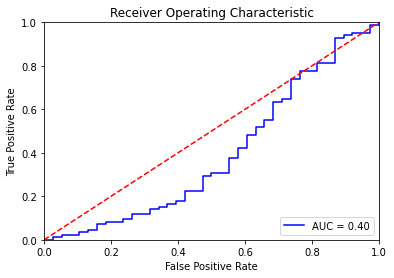

In [ ]:
# ROC Curve

# calculate the fpr and tpr for all thresholds of the classification
scores  = model6.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_true=y_test, y_score=scores[:, 1])
roc_auc = auc(fpr, tpr)

# model
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##Neural Networks


In [ ]:
from sklearn.neural_network import MLPClassifier
model7 = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
model7.fit(X_train, y_train.values.ravel())
preds7 = model7.predict(X_test)

In [ ]:
preds7

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [ ]:
y_test

150    0
559    1
598    1
235    1
145    1
      ..
363    1
280    0
7      0
289    1
373    0
Name: Loan_Status, Length: 123, dtype: int64

In [ ]:
# Check the accuracy
model7.score(X_test, y_test)

0.43902439024390244

In [ ]:
# Other validation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, log_loss

# Check accruacy
print(accuracy_score(y_pred=preds7, y_true=y_test))


0.43902439024390244


In [ ]:
#Check Log Loss
print(log_loss(y_pred=preds7, y_true=y_test))

19.37546315470145


In [ ]:
# Print the confusion matrix
confusion_matrix(y_true=y_test, y_pred=preds7)

array([[30,  8],
       [61, 24]])

In [ ]:
 #Print the classification report
print(classification_report(y_true=y_test, y_pred=preds7))

              precision    recall  f1-score   support

           0       0.33      0.79      0.47        38
           1       0.75      0.28      0.41        85

    accuracy                           0.44       123
   macro avg       0.54      0.54      0.44       123
weighted avg       0.62      0.44      0.43       123



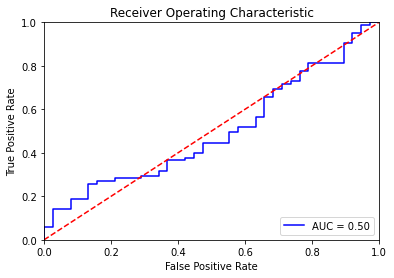

In [ ]:
# ROC Curve

# calculate the fpr and tpr for all thresholds of the classification
scores  = model7.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_true=y_test, y_score=scores[:, 1])
roc_auc = auc(fpr, tpr)

# model
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##Desicion Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model8 = DecisionTreeClassifier()
model8.fit(X_train, y_train)
preds8 = model8.predict(X_test)

In [ ]:
preds8

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
y_test

150    0
559    1
598    1
235    1
145    1
      ..
363    1
280    0
7      0
289    1
373    0
Name: Loan_Status, Length: 123, dtype: int64

In [ ]:
# Check the accuracy
model8.score(X_test, y_test)

0.7073170731707317

In [ ]:
# Other validation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

# Check accruacy
print(accuracy_score(y_pred=preds8, y_true=y_test))

0.7073170731707317


In [ ]:
# Print the confusion matrix
confusion_matrix(y_true=y_test, y_pred=preds8)

array([[23, 15],
       [21, 64]])

In [ ]:
#Print the classification report
print(classification_report(y_true=y_test, y_pred=preds8))

              precision    recall  f1-score   support

           0       0.52      0.61      0.56        38
           1       0.81      0.75      0.78        85

    accuracy                           0.71       123
   macro avg       0.67      0.68      0.67       123
weighted avg       0.72      0.71      0.71       123



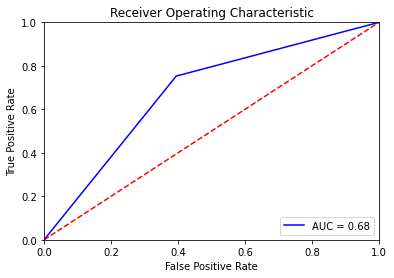

In [ ]:
# ROC Curve

# calculate the fpr and tpr for all thresholds of the classification
scores  = model8.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_true=y_test, y_score=scores[:, 1])
roc_auc = auc(fpr, tpr)

# model
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model9 =RandomForestClassifier(n_estimators=100, random_state=0)
model9.fit(X_train, y_train)
preds9 = model9.predict(X_test)

In [ ]:
preds9

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0])

In [ ]:
y_test

150    0
559    1
598    1
235    1
145    1
      ..
363    1
280    0
7      0
289    1
373    0
Name: Loan_Status, Length: 123, dtype: int64

In [ ]:
model9.score(X_test, y_test)

0.8292682926829268

In [ ]:
# Other validation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

# Check accruacy
print(accuracy_score(y_pred=preds9, y_true=y_test))

0.8292682926829268


In [ ]:
# Print the confusion matrix
confusion_matrix(y_true=y_test, y_pred=preds9)

array([[23, 15],
       [ 6, 79]])

In [ ]:
#Print the classification report
print(classification_report(y_true=y_test, y_pred=preds9))

              precision    recall  f1-score   support

           0       0.79      0.61      0.69        38
           1       0.84      0.93      0.88        85

    accuracy                           0.83       123
   macro avg       0.82      0.77      0.78       123
weighted avg       0.83      0.83      0.82       123



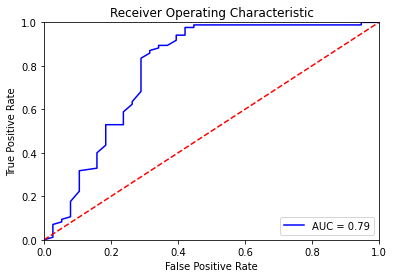

In [ ]:
# ROC Curve

# calculate the fpr and tpr for all thresholds of the classification
scores  = model9.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_true=y_test, y_score=scores[:, 1])
roc_auc = auc(fpr, tpr)

# model
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()